# Project: Wrangling and Analyze Data

### Table of Contents
1. [Data Gathering](#gather)
2. [Assessing Data](#access)
3. [Cleaning Data](#clean)
4. [Storing Data](#store)
5. [Analyzing and Visualizing Data](#a&v)

In [450]:
import pandas as pd
import numpy as np
import os
import requests
import json
import time
import datetime
pd.set_option('display.max_columns', None)

## For section to use Tweepy library to query the Twitter API for each tweet's JSON
import tweepy
from tweepy import OAuthHandler
import json
from timeit import default_timer as timer

## Visualization
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

## Data Gathering <a id="gather"></a>

In the cell below, gather **all** three pieces of data for this project and load them in the notebook. **Note:** the methods required to gather each data are different.
1. Directly download the WeRateDogs Twitter archive data (twitter_archive_enhanced.csv)

In [451]:
# Read csv file into DataFrame 
archive = pd.read_csv('twitter_archive_enhanced.csv')
archive.head()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None,None,None,None
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,None,None,None,None
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,None,None,None,None


2. Use the Requests library to download the tweet image prediction (image_predictions.tsv)

In [452]:
# access the file
url = "https://d17h27t6h515a5.cloudfront.net/topher/2017/August/599fd2ad_image-predictions/image-predictions.tsv"
response = requests.get(url)

# we now open the file and write contents and assign 'file' variable
with open('image_prediction.tsv', mode = 'wb') as file:
    file.write(response.content)
    
# check if the file has been downloaded
os.listdir()

['twitter_archive_master.csv',
 'tweet_json.txt',
 'wrangle_report.pdf',
 'twitter_archive_enhanced.csv',
 'act_report.pdf',
 '.ipynb_checkpoints',
 'image_prediction.tsv',
 'wrangle_act.html',
 'wrangle_act.ipynb']

In [453]:
# read the image prediction file
prediction = pd.read_csv('image_prediction.tsv', sep='\t')
prediction.head()

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True


3. Use the Tweepy library to query additional data via the Twitter API (tweet_json.txt)

In [454]:
#consumer_key = 'HIDDEN'
#consumer_secret = 'HIDDEN'
#access_token = 'HIDDEN'
#access_secret = 'HIDDEN'

#try:
#auth = tweepy.OAuthHandler(consumer_key, consumer_secret)
#auth.set_access_token(access_token, access_secret)



#api = tweepy.API(auth, 
#                 wait_on_rate_limit=True, 
#                 wait_on_rate_limit_notify= True)

#test=[]

> I used the JSON file provided by Udacity

In [455]:
# for loop using the tweet_ids from the twitter archive file
#tweet_ids = twitter_archive.tweet_id.values

#with open('tweet_json.txt', 'w') as outfile:
#    for tweet_id in tweet_ids:
#        try:
#            tweet = api.get_status(tweet_id, tweet_mode='extended')
#            json.dump(tweet._json, outfile)
#            outfile.write('\n')
#        except tweepy.TweepError as e:
#            #print("Fail")
#            pass

> I used the JSON file provided by Udacity

In [456]:
# Using the JSON file provided by Udacity, read the file and append the data using dictionary keys
# this will be saved under "df_twitter_list"

df_twitter_list = []

for line in open('tweet_json.txt', 'r'):
    twitter_data = json.loads(line)
    df_twitter_list.append({'tweet_id': twitter_data['id_str'],
                            'retweet_count': twitter_data['retweet_count'],
                            'favorite_count': twitter_data['favorite_count'],
                            'followers_count': twitter_data['user']['followers_count']})

In [457]:
# Create a new dataframe (using "df_twitter_list") and assign it to be "twitter_api"
twitter_api = pd.DataFrame(df_twitter_list, columns = ['tweet_id',
                                                       'retweet_count',
                                                       'favorite_count',
                                                       'followers_count'])
twitter_api.head()

,tweet_id,retweet_count,favorite_count,followers_count
0,892420643555336193,8853,39467,3200889
1,892177421306343426,6514,33819,3200889
2,891815181378084864,4328,25461,3200889
3,891689557279858688,8964,42908,3200889
4,891327558926688256,9774,41048,3200889


In [458]:
twitter_api.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2354 entries, 0 to 2353
Data columns (total 4 columns):
tweet_id           2354 non-null object
retweet_count      2354 non-null int64
favorite_count     2354 non-null int64
followers_count    2354 non-null int64
dtypes: int64(3), object(1)
memory usage: 73.6+ KB


## Assessing Data <a id="access"></a>
In this section, detect and document at least **eight (8) quality issues and two (2) tidiness issue**. You must use **both** visual assessment
programmatic assessement to assess the data.

**Note:** pay attention to the following key points when you access the data.

* You only want original ratings (no retweets) that have images. Though there are 5000+ tweets in the dataset, not all are dog ratings and some are retweets.
* Assessing and cleaning the entire dataset completely would require a lot of time, and is not necessary to practice and demonstrate your skills in data wrangling. Therefore, the requirements of this project are only to assess and clean at least 8 quality issues and at least 2 tidiness issues in this dataset.
* The fact that the rating numerators are greater than the denominators does not need to be cleaned. This [unique rating system](http://knowyourmeme.com/memes/theyre-good-dogs-brent) is a big part of the popularity of WeRateDogs.
* You do not need to gather the tweets beyond August 1st, 2017. You can, but note that you won't be able to gather the image predictions for these tweets since you don't have access to the algorithm used.



#### We have the following datasets:

- `archive` - It is a twitter archived dataset from WeRateDogs, and this was provided to us at the beginning of the analysis.
- `prediction`  - It is the tweet image prediction (image_predictions.tsv) that we have downloaded.
- `twitter_api` - It is the additional data that was queried via the Twitter API. 

### `Archive` Table

In [459]:
archive.head()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None,None,None,None
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,None,None,None,None
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,None,None,None,None


In [460]:
archive.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
tweet_id                      2356 non-null int64
in_reply_to_status_id         78 non-null float64
in_reply_to_user_id           78 non-null float64
timestamp                     2356 non-null object
source                        2356 non-null object
text                          2356 non-null object
retweeted_status_id           181 non-null float64
retweeted_status_user_id      181 non-null float64
retweeted_status_timestamp    181 non-null object
expanded_urls                 2297 non-null object
rating_numerator              2356 non-null int64
rating_denominator            2356 non-null int64
name                          2356 non-null object
doggo                         2356 non-null object
floofer                       2356 non-null object
pupper                        2356 non-null object
puppo                         2356 non-null object
dtypes: float64(4), int64(3), ob

>- 'reply', and 'retweet' columns are not important
>- `tweet_id` should be string
>- `timestamp` should be datetime

In [461]:
# Here i am interested to see if there was any error in the dog stages. I expect to see two unique entries.
archive.nunique()

tweet_id                      2356
in_reply_to_status_id           77
in_reply_to_user_id             31
timestamp                     2356
source                           4
text                          2356
retweeted_status_id            181
retweeted_status_user_id        25
retweeted_status_timestamp     181
expanded_urls                 2218
rating_numerator                40
rating_denominator              18
name                           957
doggo                            2
floofer                          2
pupper                           2
puppo                            2
dtype: int64

In [462]:
# I have discovered that the 'name' column has some names which are not really names, but it easy to spot them as they all 
#start with a lowercase.
incorrect_names_mask = archive.name.str.contains('^[a-z]', regex = True)
archive[incorrect_names_mask].name.value_counts().sort_index()

a               55
actually         2
all              1
an               7
by               1
getting          2
his              1
incredibly       1
infuriating      1
just             4
life             1
light            1
mad              2
my               1
not              2
officially       1
old              1
one              4
quite            4
space            1
such             1
the              8
this             1
unacceptable     1
very             5
Name: name, dtype: int64

In [463]:
# We now count the number of the incorrect names:
len(archive[incorrect_names_mask])

109

In [464]:
archive.name.value_counts()

None         745
a             55
Charlie       12
Lucy          11
Cooper        11
Oliver        11
Lola          10
Penny         10
Tucker        10
Bo             9
Winston        9
Sadie          8
the            8
Buddy          7
Toby           7
Bailey         7
Daisy          7
an             7
Jax            6
Milo           6
Scout          6
Bella          6
Stanley        6
Rusty          6
Oscar          6
Jack           6
Koda           6
Leo            6
Dave           6
Sunny          5
            ... 
Kona           1
Rooney         1
Fillup         1
Snoopy         1
Mingus         1
Kendall        1
Beckham        1
Pippin         1
Pancake        1
Suki           1
Bruiser        1
Tino           1
Carll          1
Bowie          1
Timofy         1
Mac            1
Stella         1
Antony         1
Grady          1
Jessifer       1
Crawford       1
Grizzwald      1
Wafer          1
Diogi          1
Fletcher       1
Lacy           1
Lili           1
Ralphé        

In [465]:
# Source column
archive.source.value_counts()

<a href="http://twitter.com/download/iphone" rel="nofollow">Twitter for iPhone</a>     2221
<a href="http://vine.co" rel="nofollow">Vine - Make a Scene</a>                          91
<a href="http://twitter.com" rel="nofollow">Twitter Web Client</a>                       33
<a href="https://about.twitter.com/products/tweetdeck" rel="nofollow">TweetDeck</a>      11
Name: source, dtype: int64

> There are only 4 types of devices used to post on twitter and the URLs present are not useful

In [466]:
# Here i want to check if the denominator of 10 was not used in some cases:
archive.rating_denominator.value_counts()

10     2333
11        3
50        3
80        2
20        2
2         1
16        1
40        1
70        1
15        1
90        1
110       1
120       1
130       1
150       1
170       1
7         1
0         1
Name: rating_denominator, dtype: int64

> It is clear that the value of 10 was not always a denominator.

In [467]:
# Tweets with missing urls
sum(archive.expanded_urls.isna())

59

### `Prediction` Table

In [468]:
prediction.head()

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True


In [469]:
prediction.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 12 columns):
tweet_id    2075 non-null int64
jpg_url     2075 non-null object
img_num     2075 non-null int64
p1          2075 non-null object
p1_conf     2075 non-null float64
p1_dog      2075 non-null bool
p2          2075 non-null object
p2_conf     2075 non-null float64
p2_dog      2075 non-null bool
p3          2075 non-null object
p3_conf     2075 non-null float64
p3_dog      2075 non-null bool
dtypes: bool(3), float64(3), int64(2), object(4)
memory usage: 152.1+ KB


>- `tweet_id` should be string
>- `img_num` is not important
>- No NULL values

In [470]:
prediction.duplicated().value_counts()

False    2075
dtype: int64

> No duplicates

### `Twitter_api` Table

In [471]:
twitter_api.head()

,tweet_id,retweet_count,favorite_count,followers_count
0,892420643555336193,8853,39467,3200889
1,892177421306343426,6514,33819,3200889
2,891815181378084864,4328,25461,3200889
3,891689557279858688,8964,42908,3200889
4,891327558926688256,9774,41048,3200889


In [472]:
twitter_api.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2354 entries, 0 to 2353
Data columns (total 4 columns):
tweet_id           2354 non-null object
retweet_count      2354 non-null int64
favorite_count     2354 non-null int64
followers_count    2354 non-null int64
dtypes: int64(3), object(1)
memory usage: 73.6+ KB


> DataTypes are correct & no NULL values

In [473]:
twitter_api.duplicated().value_counts()

False    2354
dtype: int64

> No duplicates

### Quality issues

#### `archive` table: 

1. Replace 109 invalid names in column `name` of dogs (e.g. 'a', 'an', 'very', 'actually', 'O', 'just', 'my', 'all', 'infuriating', 'the', etc.) with 'NaN'.

2. In the `name` column, replace the value of `None` with `NaN`

3. Remove all rows that have values (not blank or non-null) in `retweeted_status_id`, `retweeted_status_user_id`, and `retweeted_status_timestamp` columns, as we only want original dog ratings as per the specification.

4. Drop columns the following columns because were instructed to keep the original tweets that have images:
    - `in_reply_to_status_id` 
    - `in_reply_to_user_id` 
    - `retweeted_status_id`
    - `retweeted_status_user_id`
    - `retweeted_status_timestamp`

5. Extract only the device name in the `source` column and delete all other information as it does not provide any helpful information.
    
6. DataType for column `timestamp` - Should be datetime

7. Column `tweet_id` - Should be a string/object as there is no reason for them to be in a numeric form. This will assist when we merge/combine tables.
    
8. Remove 'HTML tags'/'URLs' that are present in the `text` column

9. In the `rating_numerator` column there are values that were not extracted properly (from the `text` column) as they were decimals 




#### `prediction` table:

10. Column `tweet_id` - Should be a string/object to assist when we merge/combine tables.

11. Capitalize the first letter of the names in `p1`, `p2`, and `p3`

12. Drop `img_num` column as it will not be useful





### Tidiness issues

1. `archive` table - Combine the four columns for dog stages (`doggo`, `floofer`, `pupper`, `puppo`) to form one column.
2. In the `archive_clean` table, `timestamp` column should be split into 3 columns, `year`, `month`, and `day`
3. Combine `prediction`, and `twitter_api` tables  with the `archive` table to form one table.

## Cleaning Data <a id="clean"></a>
In this section, clean **all** of the issues you documented while assessing. 

**Note:** Make a copy of the original data before cleaning. Cleaning includes merging individual pieces of data according to the rules of [tidy data](https://cran.r-project.org/web/packages/tidyr/vignettes/tidy-data.html). The result should be a high-quality and tidy master pandas DataFrame (or DataFrames, if appropriate).

In [474]:
# Make copies of original pieces of data
archive_clean = archive.copy()
prediction_clean = prediction.copy()
twitter_api_clean = twitter_api.copy()

### Quality issue 1 - `archive_clean` Table  

#### Define: 
Replace 109 invalid names in column `name` of dogs (e.g. 'a', 'an', 'very', 'actually', 'O', 'just', 'my', 'all', 'infuriating', 'the', etc.) with 'None'. They all start with a lowercase.

In [475]:
# find invalid names represented by lowercase first letter:

invalid_names = archive_clean.name.str.contains('^[a-z]')
archive_clean[invalid_names].name.value_counts().sort_index()

a               55
actually         2
all              1
an               7
by               1
getting          2
his              1
incredibly       1
infuriating      1
just             4
life             1
light            1
mad              2
my               1
not              2
officially       1
old              1
one              4
quite            4
space            1
such             1
the              8
this             1
unacceptable     1
very             5
Name: name, dtype: int64

#### Code

In [476]:
archive_clean['name'][archive_clean['name'].str.match('[a-z]+')] = 'None'

/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


#### Test

In [477]:
archive_clean['name'].value_counts()

None          854
Charlie        12
Cooper         11
Lucy           11
Oliver         11
Lola           10
Penny          10
Tucker         10
Winston         9
Bo              9
Sadie           8
Buddy           7
Bailey          7
Daisy           7
Toby            7
Dave            6
Scout           6
Bella           6
Jax             6
Stanley         6
Oscar           6
Rusty           6
Milo            6
Koda            6
Leo             6
Jack            6
Phil            5
Alfie           5
Oakley          5
Louis           5
             ... 
Kevon           1
Naphaniel       1
Bradley         1
Zooey           1
Flurpson        1
Lili            1
Fletcher        1
Ben             1
Carll           1
Sully           1
Longfellow      1
Hubertson       1
Coleman         1
Holly           1
Milky           1
Suki            1
Bruiser         1
Tino            1
Bowie           1
Diogi           1
Timofy          1
Mac             1
Antony          1
Pancake         1
Grady     

> Rows with invalid names (represented by a lowercase first letter) have all been removed. The reason for removing these rows was because we did not have enough time to rename them one by one as their names were in different locations in the `text` column.

### Quality issue 2 - `archive_clean` Table

#### Define
In the `name` column, replace the value of `None` with `NaN`. This is to make the affected values to be recognised as those containing NULL values.

In [478]:
archive_clean['name'] = archive_clean['name'].replace('None', np.nan)

#### Test

In [479]:
archive_clean.sample(5)

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
508,812503143955202048,NaN,NaN,2016-12-24 03:40:19 +0000,"<a href=""http://twitter.com/download/iphone"" r...",I'm happy to inform you all that Jake is in ex...,NaN,NaN,NaN,https://m.facebook.com/story.php?story_fbid=18...,13,10,NaN,None,None,None,None
1383,700847567345688576,NaN,NaN,2016-02-20 01:00:55 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Meet Crouton. He's a Galapagos Boonwiddle. Has...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/700847567...,10,10,Crouton,None,None,None,None
1012,747242308580548608,NaN,NaN,2016-06-27 01:37:04 +0000,"<a href=""http://twitter.com/download/iphone"" r...",RT @dog_rates: This pupper killed this great w...,7.047611e+17,4.196984e+09,2016-03-01 20:11:59 +0000,https://twitter.com/dog_rates/status/704761120...,13,10,NaN,None,None,pupper,None
766,777684233540206592,NaN,NaN,2016-09-19 01:42:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...","""Yep... just as I suspected. You're not flossi...",NaN,NaN,NaN,https://twitter.com/dog_rates/status/777684233...,12,10,NaN,None,None,None,None
1425,697943111201378304,NaN,NaN,2016-02-12 00:39:39 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Cassie. She goes door to door trying t...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/697943111...,10,10,Cassie,None,None,None,None


In [480]:
archive_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
tweet_id                      2356 non-null int64
in_reply_to_status_id         78 non-null float64
in_reply_to_user_id           78 non-null float64
timestamp                     2356 non-null object
source                        2356 non-null object
text                          2356 non-null object
retweeted_status_id           181 non-null float64
retweeted_status_user_id      181 non-null float64
retweeted_status_timestamp    181 non-null object
expanded_urls                 2297 non-null object
rating_numerator              2356 non-null int64
rating_denominator            2356 non-null int64
name                          1502 non-null object
doggo                         2356 non-null object
floofer                       2356 non-null object
pupper                        2356 non-null object
puppo                         2356 non-null object
dtypes: float64(4), int64(3), ob

> Our changes were effected as we can see that the total for non-null values for the `name` column has decreased.

### Quality issue 3 - `archive_clean` Table

#### Define
Remove all rows that have values (not blank or non-null) in `retweeted_status_id`, `retweeted_status_user_id`, and `retweeted_status_timestamp` columns, as we only want original dog ratings as per the specification.

#### Code

In [481]:
archive_clean = archive_clean[archive_clean.retweeted_status_id.isnull()]
archive_clean = archive_clean[archive_clean.retweeted_status_user_id.isnull()]
archive_clean = archive_clean[archive_clean.retweeted_status_timestamp.isnull()]

#### Test

In [482]:
archive_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2175 entries, 0 to 2355
Data columns (total 17 columns):
tweet_id                      2175 non-null int64
in_reply_to_status_id         78 non-null float64
in_reply_to_user_id           78 non-null float64
timestamp                     2175 non-null object
source                        2175 non-null object
text                          2175 non-null object
retweeted_status_id           0 non-null float64
retweeted_status_user_id      0 non-null float64
retweeted_status_timestamp    0 non-null object
expanded_urls                 2117 non-null object
rating_numerator              2175 non-null int64
rating_denominator            2175 non-null int64
name                          1391 non-null object
doggo                         2175 non-null object
floofer                       2175 non-null object
pupper                        2175 non-null object
puppo                         2175 non-null object
dtypes: float64(4), int64(3), object(1

> Rows with non-null values in `retweeted_status_id`, `retweeted_status_user_id`, and `retweeted_status_timestamp` have been removed as shown above.

### Quality issue 4 - `archive_clean` Table

#### Define
In the `archive_clean` Table, we will drop the following columns as they will not useful i.e `in_reply_to_status_id`, `in_reply_to_user_id`, `retweeted_status_id`, `retweeted_status_timestamp`, and `retweeted_status_user_id` 

#### Code 

In [483]:
archive_clean = archive_clean.drop(['in_reply_to_status_id', 
                                    'in_reply_to_user_id', 
                                    'retweeted_status_id',
                                   'retweeted_status_user_id',
                                   'retweeted_status_timestamp'], axis=1)

#### Test 

In [484]:
list(archive_clean)

['tweet_id',
 'timestamp',
 'source',
 'text',
 'expanded_urls',
 'rating_numerator',
 'rating_denominator',
 'name',
 'doggo',
 'floofer',
 'pupper',
 'puppo']

In [485]:
archive_clean.head(5)

,tweet_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None
1,892177421306343426,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None
2,891815181378084864,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None,None,None,None
3,891689557279858688,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,None,None,None,None
4,891327558926688256,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,None,None,None,None


### Quality issue 5 - `archive_clean` Table

#### Define
In the `archive_clean` Table, we will ensure that the`source` column only show the type of a device used to post on twitter. We will extract only the device name and delete all other information as it does not provide any helpful information.


#### Code

In [486]:
# extracting only the type of device used to post on twitter
# example of the URL: <a href="http://twitter.com/download/iphone" rel="nofollow">Twitter for iPhone</a>

archive_clean['source'] = archive_clean.source.str.extract(r'rel="nofollow">(.*)<')

#### Test

In [487]:
archive_clean.sample(5)

,tweet_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
203,853299958564483072,2017-04-15 17:32:18 +0000,Twitter for iPhone,This is Rumpole. He'll be your Uber driver thi...,https://twitter.com/dog_rates/status/853299958...,13,10,Rumpole,None,None,None,None
261,842846295480000512,2017-03-17 21:13:10 +0000,Twitter for iPhone,This is Charlie. He's wishing you a very fun a...,https://twitter.com/dog_rates/status/842846295...,13,10,Charlie,None,None,None,None
711,784517518371221505,2016-10-07 22:15:26 +0000,Twitter for iPhone,This is Frankie. He has yet to learn how to co...,https://twitter.com/dog_rates/status/784517518...,11,10,Frankie,None,None,None,None
1004,747816857231626240,2016-06-28 15:40:07 +0000,Twitter for iPhone,Viewer discretion is advised. This is a terrib...,https://twitter.com/dog_rates/status/747816857...,4,10,NaN,None,None,None,None
338,832369877331693569,2017-02-16 23:23:38 +0000,Twitter for iPhone,This is Charlie. He fell asleep on a heating v...,https://twitter.com/dog_rates/status/832369877...,11,10,Charlie,None,None,None,None


In [488]:
archive_clean.source.unique()

array(['Twitter for iPhone', 'Twitter Web Client', 'Vine - Make a Scene',
       'TweetDeck'], dtype=object)

In [489]:
archive_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2175 entries, 0 to 2355
Data columns (total 12 columns):
tweet_id              2175 non-null int64
timestamp             2175 non-null object
source                2175 non-null object
text                  2175 non-null object
expanded_urls         2117 non-null object
rating_numerator      2175 non-null int64
rating_denominator    2175 non-null int64
name                  1391 non-null object
doggo                 2175 non-null object
floofer               2175 non-null object
pupper                2175 non-null object
puppo                 2175 non-null object
dtypes: int64(3), object(9)
memory usage: 220.9+ KB


### Quality issue 6 - `archive_clean` Table

#### Define
Column `timestamp` - Should be datetime

#### Code

In [490]:
# converting to DateTime
archive_clean['timestamp'] = pd.to_datetime(pd.to_datetime(archive_clean['timestamp']).dt.date)


#### Test

In [491]:
# verify changes
archive_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2175 entries, 0 to 2355
Data columns (total 12 columns):
tweet_id              2175 non-null int64
timestamp             2175 non-null datetime64[ns]
source                2175 non-null object
text                  2175 non-null object
expanded_urls         2117 non-null object
rating_numerator      2175 non-null int64
rating_denominator    2175 non-null int64
name                  1391 non-null object
doggo                 2175 non-null object
floofer               2175 non-null object
pupper                2175 non-null object
puppo                 2175 non-null object
dtypes: datetime64[ns](1), int64(3), object(8)
memory usage: 220.9+ KB


### Quality issue 7 - `archive_clean` Table

#### Define
Correct the datatype for the Column `tweet_id` - It should be a string/object as it does not have any numeric significance.

In [492]:
# We will convert `tweet_id` to strings datatype for tweet_id column

archive_clean['tweet_id'] = archive_clean.tweet_id.astype('str')

#### Test

In [493]:
# archive_clean table
archive_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2175 entries, 0 to 2355
Data columns (total 12 columns):
tweet_id              2175 non-null object
timestamp             2175 non-null datetime64[ns]
source                2175 non-null object
text                  2175 non-null object
expanded_urls         2117 non-null object
rating_numerator      2175 non-null int64
rating_denominator    2175 non-null int64
name                  1391 non-null object
doggo                 2175 non-null object
floofer               2175 non-null object
pupper                2175 non-null object
puppo                 2175 non-null object
dtypes: datetime64[ns](1), int64(2), object(9)
memory usage: 220.9+ KB


### Quality issue 8 - `archive_clean` table

#### Define
Remove 'HTML tags'/'URLs' that are present in the `text` column

#### Code

In [494]:
def html_url(x):
    html_url_location = x.find("https")
    
    #The "text" column will remain unchanged if there is no link found
    if html_url_location == -1:
        x = x
    else:
        #Remove space before link up to the end
        x = x[:html_url_location -1]
    return x

archive_clean.text = archive_clean.text.apply(html_url)
    

#### Test

In [495]:
with pd.option_context('max_colwidth', 150):
    display(archive_clean['text'][:15])
    

0                                                          This is Phineas. He's a mystical boy. Only ever appears in the hole of a donut. 13/10
1     This is Tilly. She's just checking pup on you. Hopes you're doing ok. If not, she's available for pats, snugs, boops, the whole bit. 13/10
2                      This is Archie. He is a rare Norwegian Pouncing Corgo. Lives in the tall grass. You never know when one may strike. 12/10
3                                                                This is Darla. She commenced a snooze mid meal. 13/10 happens to the best of us
4     This is Franklin. He would like you to stop calling him "cute." He is a very fierce shark and should be respected as such. 12/10 #BarkWeek
5     Here we have a majestic great white breaching off South Africa's coast. Absolutely h*ckin breathtaking. 13/10 (IG: tucker_marlo) #BarkWeek
6                          Meet Jax. He enjoys ice cream so much he gets nervous around it. 13/10 help Jax enjoy more things by cl

### Quality issue 9 - `archive_clean` Table

#### Define
> In the `rating_numerator` column there are values that were not extracted properly from the `text` column as they were decimals 

In [496]:
# In order to view the numeratators that were erronously extracted, we will use a "Context manager" to temporarily set options in 
#the with statement context. We want to view values on either side of a symbol "/":


with pd.option_context('max_colwidth', 200):
    display(archive_clean[archive_clean['text'].str.contains(r"(\d+\.\d*\/\d+)")]
            [['tweet_id', 'text', 'rating_numerator', 'rating_denominator']])


/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:6: UserWarning: This pattern has match groups. To actually get the groups, use str.extract.
  


,tweet_id,text,rating_numerator,rating_denominator
45,883482846933004288,"This is Bella. She hopes her smile made you smile. If not, she is also offering you her favorite monkey. 13.5/10",5,10
695,786709082849828864,"This is Logan, the Chow who lived. He solemnly swears he's up to lots of good. H*ckin magical af 9.75/10",75,10
763,778027034220126208,This is Sophie. She's a Jubilant Bush Pupper. Super h*ckin rare. Appears at random just to smile at the locals. 11.27/10 would smile back,27,10
1689,681340665377193984,I've been told there's a slight possibility he's checking his mirror. We'll bump to 9.5/10. Still a menace,5,10
1712,680494726643068929,Here we have uncovered an entire battalion of holiday puppers. Average of 11.26/10,26,10


#### Code

In [497]:
# We will fix the data errornously extracted, and to do this, we also change the datatype in the two columns to float so that we do not get an arror.


rating = archive_clean.text.str.extract('((?:\d+\.)?\d+)\/(\d+)', expand=True)
rating.columns = ['rating_numerator', 'rating_denominator']
archive_clean['rating_numerator'] = rating['rating_numerator'].astype(float)
archive_clean['rating_denominator'] = rating['rating_denominator'].astype(float)


#### Test

In [498]:
with pd.option_context('max_colwidth', 200):
    display(archive_clean[archive_clean['text'].str.contains(r"(\d+\.\d*\/\d+)")]
            [['tweet_id', 'text', 'rating_numerator', 'rating_denominator']])

/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:2: UserWarning: This pattern has match groups. To actually get the groups, use str.extract.
  


,tweet_id,text,rating_numerator,rating_denominator
45,883482846933004288,"This is Bella. She hopes her smile made you smile. If not, she is also offering you her favorite monkey. 13.5/10",13.50,10.0
695,786709082849828864,"This is Logan, the Chow who lived. He solemnly swears he's up to lots of good. H*ckin magical af 9.75/10",9.75,10.0
763,778027034220126208,This is Sophie. She's a Jubilant Bush Pupper. Super h*ckin rare. Appears at random just to smile at the locals. 11.27/10 would smile back,11.27,10.0
1689,681340665377193984,I've been told there's a slight possibility he's checking his mirror. We'll bump to 9.5/10. Still a menace,9.50,10.0
1712,680494726643068929,Here we have uncovered an entire battalion of holiday puppers. Average of 11.26/10,11.26,10.0


### Quality issue 10 `prediction_clean` table

#### Define

Correct the datatype for the Column `tweet_id` - It should be a string/object as it does not have any numeric significance.

In [499]:
# We will convert `tweet_id` to strings datatype for 'tweet_id' colum

prediction_clean['tweet_id'] = prediction_clean.tweet_id.astype('str')

#### Test

In [500]:
prediction_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 12 columns):
tweet_id    2075 non-null object
jpg_url     2075 non-null object
img_num     2075 non-null int64
p1          2075 non-null object
p1_conf     2075 non-null float64
p1_dog      2075 non-null bool
p2          2075 non-null object
p2_conf     2075 non-null float64
p2_dog      2075 non-null bool
p3          2075 non-null object
p3_conf     2075 non-null float64
p3_dog      2075 non-null bool
dtypes: bool(3), float64(3), int64(1), object(5)
memory usage: 152.1+ KB


### Quality issue 11 - `prediction_clean` table

#### Define
Capitalize the first letter of the names in `p1`, `p2`, and `p3`

#### Code

In [501]:
prediction_clean.p1 = prediction.p1.str.capitalize()
prediction_clean.p2 = prediction.p2.str.capitalize()
prediction_clean.p3 = prediction.p3.str.capitalize()

#### Test

In [502]:
prediction_clean.sample(5)

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
1680,813800681631023104,https://pbs.twimg.com/media/C0szZh_XUAAm9je.jpg,1,Malamute,0.501159,True,Siberian_husky,0.228792,True,Eskimo_dog,0.200388,True
481,675362609739206656,https://pbs.twimg.com/media/CV9etctWUAAl5Hp.jpg,1,Labrador_retriever,0.479008,True,Ice_bear,0.218289,False,Kuvasz,0.139911,True
1786,829449946868879360,https://pbs.twimg.com/media/C4LMUf8WYAkWz4I.jpg,1,Labrador_retriever,0.315163,True,Golden_retriever,0.153210,True,Pekinese,0.132791,True
409,673715861853720576,https://pbs.twimg.com/media/CVmE_fAWIAAlDhU.jpg,1,Suit,0.404115,False,Bow_tie,0.294683,False,Windsor_tie,0.132701,False
1679,813217897535406080,https://pbs.twimg.com/media/C0khWkVXEAI389B.jpg,1,Samoyed,0.905972,True,Pomeranian,0.048038,True,West_highland_white_terrier,0.035667,True


### Quality issue 12 - `prediction_clean` Table

#### Define
Drop `img_num` column as it will not be useful

#### Code

In [503]:
prediction_clean = prediction_clean.drop('img_num', axis = 1)

#### Test

In [504]:
list(prediction_clean)

['tweet_id',
 'jpg_url',
 'p1',
 'p1_conf',
 'p1_dog',
 'p2',
 'p2_conf',
 'p2_dog',
 'p3',
 'p3_conf',
 'p3_dog']

### Tidiness issue 1 

#### Define
In the `archive` table - Combine the four columns for dog stages (`doggo`, `floofer`, `pupper`, `puppo`) to form one column

In [505]:
archive_clean.head()

,tweet_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,2017-08-01,Twitter for iPhone,This is Phineas. He's a mystical boy. Only eve...,https://twitter.com/dog_rates/status/892420643...,13.0,10.0,Phineas,None,None,None,None
1,892177421306343426,2017-08-01,Twitter for iPhone,This is Tilly. She's just checking pup on you....,https://twitter.com/dog_rates/status/892177421...,13.0,10.0,Tilly,None,None,None,None
2,891815181378084864,2017-07-31,Twitter for iPhone,This is Archie. He is a rare Norwegian Pouncin...,https://twitter.com/dog_rates/status/891815181...,12.0,10.0,Archie,None,None,None,None
3,891689557279858688,2017-07-30,Twitter for iPhone,This is Darla. She commenced a snooze mid meal...,https://twitter.com/dog_rates/status/891689557...,13.0,10.0,Darla,None,None,None,None
4,891327558926688256,2017-07-29,Twitter for iPhone,This is Franklin. He would like you to stop ca...,https://twitter.com/dog_rates/status/891327558...,12.0,10.0,Franklin,None,None,None,None


#### Code

In [506]:
# We will use a 'for loop' to filter dog stages so that we are only left with dog stages (and also replace 'None' with empty spaces)
stage = ['doggo', 'floofer', 'pupper', 'puppo']
for i in stage:
    archive_clean[i] = archive_clean[i].replace('None', '')

In [507]:
# We will use "str.cat" to concatenate and create a new colum 'dog_stage' which will contain all dog stages
archive_clean['dog_stage'] = archive_clean.doggo.str.cat(archive_clean.floofer).str.cat(archive_clean.pupper).str.cat(archive_clean.puppo)


In [508]:
# drop columns 'doggo', 'floofer', 'pupper', 'puppo'
archive_clean = archive_clean.drop(['doggo', 'floofer', 'pupper', 'puppo'], axis = 1)

In [509]:
# We will replace the empty spaces on column 'dog_stages' with 'np.nan' which will be displayed as 'NaN' on our table
archive_clean['dog_stage'] = archive_clean['dog_stage'].replace('', np.nan)

In [510]:
archive_clean['dog_stage'].unique()

array([nan, 'doggo', 'puppo', 'pupper', 'floofer', 'doggopuppo',
       'doggofloofer', 'doggopupper'], dtype=object)

In [511]:
# In instances, where there are multiple stages for a tweet (i.e. 'doggopupperdoggo', 'doggofloofer', and 'doggopuppo'),
#we will capture it to be in a more readable form (e.g. "doggo, puppo")

archive_clean.loc[archive_clean.dog_stage == 'doggopupper', 'dog_stage'] = 'doggo, pupper'
archive_clean.loc[archive_clean.dog_stage == 'doggofloofer', 'dog_stage'] = 'doggo, floofer'
archive_clean.loc[archive_clean.dog_stage == 'doggopuppo', 'dog_stage'] = 'doggo, puppo'

#### Test

In [512]:
list(archive_clean)

['tweet_id',
 'timestamp',
 'source',
 'text',
 'expanded_urls',
 'rating_numerator',
 'rating_denominator',
 'name',
 'dog_stage']

In [513]:
archive_clean.head(10)

,tweet_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,dog_stage
0,892420643555336193,2017-08-01,Twitter for iPhone,This is Phineas. He's a mystical boy. Only eve...,https://twitter.com/dog_rates/status/892420643...,13.0,10.0,Phineas,NaN
1,892177421306343426,2017-08-01,Twitter for iPhone,This is Tilly. She's just checking pup on you....,https://twitter.com/dog_rates/status/892177421...,13.0,10.0,Tilly,NaN
2,891815181378084864,2017-07-31,Twitter for iPhone,This is Archie. He is a rare Norwegian Pouncin...,https://twitter.com/dog_rates/status/891815181...,12.0,10.0,Archie,NaN
3,891689557279858688,2017-07-30,Twitter for iPhone,This is Darla. She commenced a snooze mid meal...,https://twitter.com/dog_rates/status/891689557...,13.0,10.0,Darla,NaN
4,891327558926688256,2017-07-29,Twitter for iPhone,This is Franklin. He would like you to stop ca...,https://twitter.com/dog_rates/status/891327558...,12.0,10.0,Franklin,NaN
5,891087950875897856,2017-07-29,Twitter for iPhone,Here we have a majestic great white breaching ...,https://twitter.com/dog_rates/status/891087950...,13.0,10.0,NaN,NaN
6,890971913173991426,2017-07-28,Twitter for iPhone,Meet Jax. He enjoys ice cream so much he gets ...,"https://gofundme.com/ydvmve-surgery-for-jax,ht...",13.0,10.0,Jax,NaN
7,890729181411237888,2017-07-28,Twitter for iPhone,When you watch your owner call another dog a g...,https://twitter.com/dog_rates/status/890729181...,13.0,10.0,NaN,NaN
8,890609185150312448,2017-07-27,Twitter for iPhone,This is Zoey. She doesn't want to be one of th...,https://twitter.com/dog_rates/status/890609185...,13.0,10.0,Zoey,NaN
9,890240255349198849,2017-07-26,Twitter for iPhone,This is Cassie. She is a college pup. Studying...,https://twitter.com/dog_rates/status/890240255...,14.0,10.0,Cassie,doggo


In [514]:
# Verify changes regarding dogs with multiple stages:
archive_clean['dog_stage'].unique()

array([nan, 'doggo', 'puppo', 'pupper', 'floofer', 'doggo, puppo',
       'doggo, floofer', 'doggo, pupper'], dtype=object)

### Tidiness issue 2

#### Define
In the `archive_clean` table, `timestamp` column should be split into 3 columns, `year`, `month`, and `day`

In [515]:
# We will extract info from 'timestamp' in order to create the 3 new columns
archive_clean['year'] = archive_clean['timestamp'].dt.year
archive_clean['month'] = archive_clean['timestamp'].dt.month_name()
archive_clean['day'] = archive_clean['timestamp'].dt.day_name()

In [516]:
# Drop 'timestamp' column
archive_clean = archive_clean.drop('timestamp', axis = 1)

#### Test

In [517]:
archive_clean

,tweet_id,source,text,expanded_urls,rating_numerator,rating_denominator,name,dog_stage,year,month,day
0,892420643555336193,Twitter for iPhone,This is Phineas. He's a mystical boy. Only eve...,https://twitter.com/dog_rates/status/892420643...,13.0,10.0,Phineas,NaN,2017,August,Tuesday
1,892177421306343426,Twitter for iPhone,This is Tilly. She's just checking pup on you....,https://twitter.com/dog_rates/status/892177421...,13.0,10.0,Tilly,NaN,2017,August,Tuesday
2,891815181378084864,Twitter for iPhone,This is Archie. He is a rare Norwegian Pouncin...,https://twitter.com/dog_rates/status/891815181...,12.0,10.0,Archie,NaN,2017,July,Monday
3,891689557279858688,Twitter for iPhone,This is Darla. She commenced a snooze mid meal...,https://twitter.com/dog_rates/status/891689557...,13.0,10.0,Darla,NaN,2017,July,Sunday
4,891327558926688256,Twitter for iPhone,This is Franklin. He would like you to stop ca...,https://twitter.com/dog_rates/status/891327558...,12.0,10.0,Franklin,NaN,2017,July,Saturday
5,891087950875897856,Twitter for iPhone,Here we have a majestic great white breaching ...,https://twitter.com/dog_rates/status/891087950...,13.0,10.0,NaN,NaN,2017,July,Saturday
6,890971913173991426,Twitter for iPhone,Meet Jax. He enjoys ice cream so much he gets ...,"https://gofundme.com/ydvmve-surgery-for-jax,ht...",13.0,10.0,Jax,NaN,2017,July,Friday
7,890729181411237888,Twitter for iPhone,When you watch your owner call another dog a g...,https://twitter.com/dog_rates/status/890729181...,13.0,10.0,NaN,NaN,2017,July,Friday
8,890609185150312448,Twitter for iPhone,This is Zoey. She doesn't want to be one of th...,https://twitter.com/dog_rates/status/890609185...,13.0,10.0,Zoey,NaN,2017,July,Thursday
9,890240255349198849,Twitter for iPhone,This is Cassie. She is a college pup. Studying...,https://twitter.com/dog_rates/status/890240255...,14.0,10.0,Cassie,doggo,2017,July,Wednesday


### Tidiness issue 3 

#### Define
Combine `prediction_clean`, and `twitter_api_clean` tables  with the `archive_clean` table to form one table.

#### Code

In [518]:
# Merging "archive_clean" with "twitter_api_clean"
archive_apitwitter_merge = pd.merge(archive_clean, twitter_api_clean, how='inner', on=None, 
                                    left_on=None, right_on=None, left_index=False, right_index=False,
                                   sort=True, suffixes=('_x', '_y'), copy=True, indicator=False, validate=None)

In [519]:
# Merging "archive_apitwitter_merge" with "prediction_clean"

final_twitter_merge = pd.merge(archive_apitwitter_merge, prediction_clean, how='inner', on=None, 
                                    left_on=None, right_on=None, left_index=False, right_index=False,
                                   sort=True, suffixes=('_x', '_y'), copy=True, indicator=False, validate=None)

#### Test

In [520]:
final_twitter_merge.sample(5)

,tweet_id,source,text,expanded_urls,rating_numerator,rating_denominator,name,dog_stage,year,month,day,retweet_count,favorite_count,followers_count,jpg_url,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
887,699088579889332224,Twitter for iPhone,This is Charl. He's a bully. Chucks that dumbb...,https://twitter.com/dog_rates/status/699088579...,3.0,10.0,Charl,NaN,2016,February,Monday,715,2451,3200950,https://pbs.twimg.com/media/CbOpWswWEAE9kvX.jpg,Mousetrap,0.456186,False,Banded_gecko,0.258677,False,Common_iguana,0.061783,False
371,672988786805112832,Twitter for iPhone,This is Schnozz. He's had a blurred tail since...,https://twitter.com/dog_rates/status/672988786...,10.0,10.0,Schnozz,pupper,2015,December,Saturday,314,1039,3201005,https://pbs.twimg.com/media/CVbvjKqW4AA_CuD.jpg,Lakeland_terrier,0.836632,True,West_highland_white_terrier,0.073900,True,Wire-haired_fox_terrier,0.038160,True
1064,715733265223708672,Twitter for iPhone,This is a taco. We only rate dogs. Please only...,https://twitter.com/dog_rates/status/715733265...,10.0,10.0,NaN,NaN,2016,April,Friday,1920,5093,3200945,https://pbs.twimg.com/media/Ce7LlUeUUAEQkQl.jpg,Dandie_dinmont,0.740229,True,Miniature_poodle,0.081915,True,Toy_poodle,0.063748,True
158,668902994700836864,Twitter for iPhone,Meet Lambeau. He's a Whistling Haiku from the ...,https://twitter.com/dog_rates/status/668902994...,11.0,10.0,Lambeau,NaN,2015,November,Monday,107,338,3201014,https://pbs.twimg.com/media/CUhruUgUAAAa8FQ.jpg,Brittany_spaniel,0.828425,True,Ibizan_hound,0.043082,True,Blenheim_spaniel,0.028004,True
1655,818145370475810820,Twitter for iPhone,This is Autumn. Her favorite toy is a cheesebu...,https://twitter.com/dog_rates/status/818145370...,11.0,10.0,Autumn,NaN,2017,January,Sunday,3014,13671,3200894,https://pbs.twimg.com/media/C1qi26rW8AMaj9K.jpg,Golden_retriever,0.621931,True,Labrador_retriever,0.364997,True,Redbone,0.003971,True


In [521]:
final_twitter_merge.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1994 entries, 0 to 1993
Data columns (total 24 columns):
tweet_id              1994 non-null object
source                1994 non-null object
text                  1994 non-null object
expanded_urls         1994 non-null object
rating_numerator      1994 non-null float64
rating_denominator    1994 non-null float64
name                  1350 non-null object
dog_stage             306 non-null object
year                  1994 non-null int64
month                 1994 non-null object
day                   1994 non-null object
retweet_count         1994 non-null int64
favorite_count        1994 non-null int64
followers_count       1994 non-null int64
jpg_url               1994 non-null object
p1                    1994 non-null object
p1_conf               1994 non-null float64
p1_dog                1994 non-null bool
p2                    1994 non-null object
p2_conf               1994 non-null float64
p2_dog                1994 non-null 

## Storing Data <a id="store"></a>
Save gathered, assessed, and cleaned master dataset to a CSV file named "twitter_archive_master.csv".

In [522]:
# Saving gathered data using index argument in "to_csv()" function and setting it to False to avoid adding a unwanted index column in the saved file

final_twitter_merge.to_csv('twitter_archive_master.csv', index=False, encoding='utf-8')

## Analyzing and Visualizing Data <a id="a&v"></a>
In this section, analyze and visualize your wrangled data. You must produce at least **three (3) insights and one (1) visualization.**

In [523]:
master_archive = pd.read_csv('twitter_archive_master.csv')

In [524]:
master_archive.head()

,tweet_id,source,text,expanded_urls,rating_numerator,rating_denominator,name,dog_stage,year,month,day,retweet_count,favorite_count,followers_count,jpg_url,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,Twitter for iPhone,Here we have a Japanese Irish Setter. Lost eye...,https://twitter.com/dog_rates/status/666020888...,8.0,10.0,NaN,NaN,2015,November,Sunday,532,2535,3201018,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,Welsh_springer_spaniel,0.465074,True,Collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,Twitter for iPhone,This is a western brown Mitsubishi terrier. Up...,https://twitter.com/dog_rates/status/666029285...,7.0,10.0,NaN,NaN,2015,November,Sunday,48,132,3201018,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,Redbone,0.506826,True,Miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True
2,666033412701032449,Twitter for iPhone,Here is a very happy pup. Big fan of well-main...,https://twitter.com/dog_rates/status/666033412...,9.0,10.0,NaN,NaN,2015,November,Sunday,47,128,3201018,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,German_shepherd,0.596461,True,Malinois,0.138584,True,Bloodhound,0.116197,True
3,666044226329800704,Twitter for iPhone,This is a purebred Piers Morgan. Loves to Netf...,https://twitter.com/dog_rates/status/666044226...,6.0,10.0,NaN,NaN,2015,November,Monday,147,311,3201018,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,Rhodesian_ridgeback,0.408143,True,Redbone,0.360687,True,Miniature_pinscher,0.222752,True
4,666049248165822465,Twitter for iPhone,Here we have a 1949 1st generation vulpix. Enj...,https://twitter.com/dog_rates/status/666049248...,5.0,10.0,NaN,NaN,2015,November,Monday,41,111,3201018,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,Miniature_pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True


### Insights & Visualizations:
1. Popular device used for posting on twitter

2. Popular dog names (top 10)

3. Tweets by day of the week


### Visualizations
1. Correlation between `Favorite` and `Retweet`

### Insight & visualization #1 - Popular device used for posting on twitter

In [525]:
devices = master_archive['source'].value_counts()
devices

Twitter for iPhone    1955
Twitter Web Client      28
TweetDeck               11
Name: source, dtype: int64

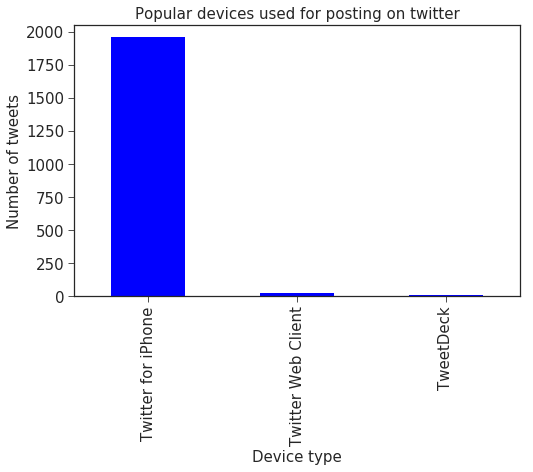

In [526]:
# Bar graph
devices_plot = devices.plot.bar(color = 'blue', fontsize=15);

#figure sizing
devices_plot.figure.set_size_inches(8,5);

# Labels
plt.title('Popular devices used for posting on twitter', fontsize=15)
plt.xlabel('Device type', fontsize=15)
plt.ylabel('Number of tweets', fontsize=15);

### Insight and visualization #2 - Popular dog name

In [527]:
# value counts for dog names
dog_names_counts = master_archive.name.value_counts()
dog_names_counts

Charlie       11
Oliver        10
Cooper        10
Lucy          10
Penny          9
Tucker         9
Winston        8
Sadie          8
Lola           7
Toby           7
Daisy          7
Bo             6
Bella          6
Stanley        6
Jax            6
Koda           6
Leo            5
Scout          5
Oscar          5
Bailey         5
Buddy          5
Chester        5
Rusty          5
Louis          5
Dave           5
Milo           5
Scooter        4
Sophie         4
Larry          4
Reggie         4
              ..
Chesterson     1
Spencer        1
Harrison       1
Blu            1
Aldrick        1
Crawford       1
Geoff          1
Grady          1
Coleman        1
Bilbo          1
Pilot          1
Kathmandu      1
Cora           1
Ben            1
Levi           1
Sully          1
Longfellow     1
Hubertson      1
Sage           1
Jeffrie        1
Milky          1
Suki           1
Emmy           1
Bruiser        1
Carll          1
Bowie          1
Timofy         1
Mac           

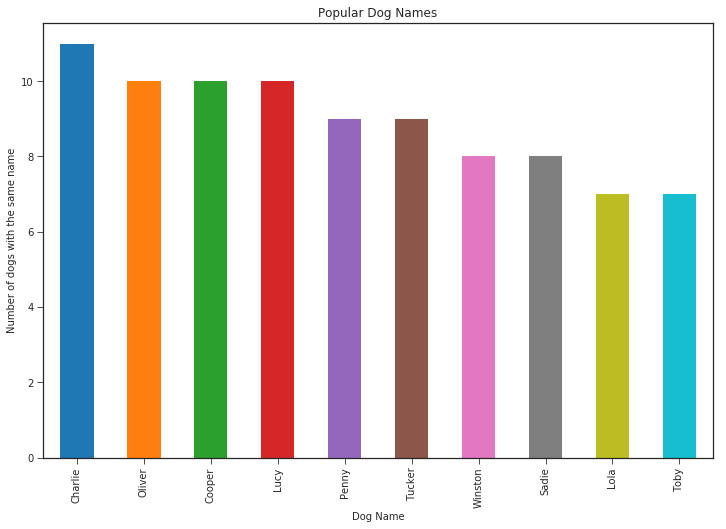

In [528]:
# we will plot a graph for the top 10 most common dog names

plt.figure(figsize=(12,8))
dog_names = dog_names_counts.nlargest(10).plot(kind='bar');

dog_names.set_title('Popular Dog Names');
dog_names.set_xlabel('Dog Name');
dog_names.set_ylabel('Number of dogs with the same name');

> Charlie is a popular dog name

### Insight & Visualization 3 - Tweets by day of the week

In [529]:
master_archive.groupby("day")['tweet_id'].count().sort_values(ascending=False)

day
Monday       327
Wednesday    297
Tuesday      295
Thursday     284
Friday       283
Sunday       256
Saturday     252
Name: tweet_id, dtype: int64

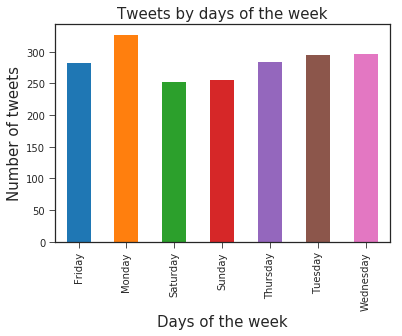

In [530]:
# Pie chart
master_archive.groupby("day")['tweet_id'].count().plot(kind='bar');

# Labels
plt.title('Tweets by days of the week', fontsize=15)
plt.xlabel('Days of the week', fontsize=15)
plt.ylabel('Number of tweets', fontsize=15);

> Most twitter users prefer to post their tweets during the week, and especially on Mondays. Weekends (Saturday & Sunday) have lowest tweets.

### Visualization #1 - Correlation between `Favorite` and `Retweet`

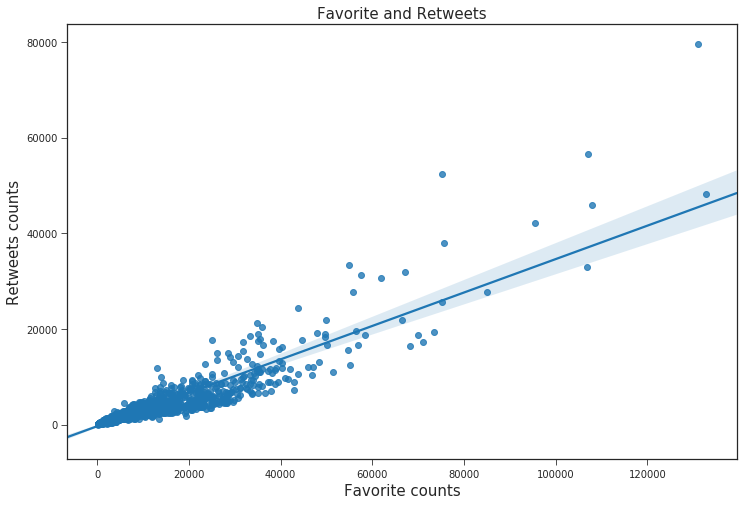

In [531]:
# Plot
sns.set_style('ticks')
fig, ax = plt.subplots()
fig.set_size_inches(12, 8)
sns.regplot(data=master_archive, x="favorite_count", y="retweet_count");

# Labels
plt.title('Favorite and Retweets', fontsize=15)
plt.xlabel('Favorite counts', fontsize=15)
plt.ylabel('Retweets counts', fontsize=15);

> The above visualization shows that there is a positive correlation between `favorite_count` and `retweet_count`, meaning that when one variable increases, the other variable also increases and vice versa.

In [532]:
# We can also show the positive correlation through the code below
master_archive['favorite_count'].corr(master_archive['retweet_count'])

0.9129466274183704